In [73]:

import numpy as np

def calculate_ltf_indices(weights, tau, gamma):
    """
    Calculate the critical index l and the opposite index m for a Linear Threshold Function.
    
    :param weights: numpy array of weights, assumed to be sorted in descending order
    :param tau: threshold for critical index l
    :param gamma: threshold for opposite index m
    :return: tuple (l, m)
    """
    n = len(weights)
        
    # Calculate partial sums
    partial_sums_decreasing = np.cumsum(weights[::-1])[::-1]
    
    # Calculate ratios
    ratios_l = weights / partial_sums_decreasing
    ratios_m = weights[:-1] / partial_sums_decreasing[1:]
    
    # Find critical index l
    l = np.argmax(ratios_l <= tau)
    if l == 0 and ratios_l[0] > tau:
        l = np.inf
    
    # Find opposite index m
    m = np.argmax(ratios_m >= gamma)
    if m == 0 and ratios_m[0] < gamma:
        m = np.inf
    return l, m

# Example usage
weights = np.array([0.5, 0.3, 0.1, 0.05, 0.03, 0.02])
tau = 0.5
gamma = 2.

l, m = calculate_ltf_indices(weights, tau, gamma)
print(f"Critical index l: {l}")
print(f"Opposite index m: {m}")
print(f"|l - m|: {abs(l - m) if l != np.inf and m != np.inf else np.inf}")

Critical index l: 0
Opposite index m: inf
|l - m|: inf


In [68]:
rng = np.random.default_rng()

alphas = np.array([1, 1, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

x = rng.dirichlet(alphas)
x = np.flip(np.sort(x))
l, m = calculate_ltf_indices(x, tau, gamma)
print(f"Critical index l: {l}")
print(f"Opposite index m: {m}")
print(f"|l - m|: {abs(l - m) if l != np.inf and m != np.inf else np.inf}")

Critical index l: 2
Opposite index m: 1
|l - m|: 1


In [75]:
x = np.array([200, 200, 200, 1., 1., 1., 1., 1., 1., 1.])
x /= x.sum()
l, m = calculate_ltf_indices(x, tau, gamma)
print(f"Critical index l: {l}")
print(f"Opposite index m: {m}")
print(f"|l - m|: {abs(l - m) if l != np.inf and m != np.inf else np.inf}")

Critical index l: 0
Opposite index m: inf
|l - m|: inf


In [84]:
import numpy as np

def calculate_ltf_indices(weights, tau, gamma):
    """
    Calculate the critical index l and the opposite index m for a Linear Threshold Function.
    
    :param weights: numpy array of weights, assumed to be sorted in descending order
    :param tau: threshold for critical index l
    :param gamma: threshold for opposite index m
    :return: tuple (l, m)
    """
    n = len(weights)
        
    # Calculate reverse cumulative sum (tail sums)
    tail_sums = np.cumsum(weights[::-1])[::-1]
    
    # Calculate ratios
    l_ratios = weights / tail_sums
    m_ratios = weights[:-1] / tail_sums[1:]
    
    # Find critical index l
    l = next((i for i, r in enumerate(l_ratios) if r <= tau), np.inf)
    
    # Find opposite index m
    m = next((i for i, r in enumerate(m_ratios[1:], 1) if r >= gamma), np.inf)
    
    return l, m

# Example usage
x = np.array([200, 200, 200, 1., 1., 1., 1., 1., 1., 1.])
x /= x.sum()
tau = 0.5
gamma = 2.0

l, m = calculate_ltf_indices(x, tau, gamma)
print(f"Critical index l: {l}") # Should be 0
print(f"Opposite index m: {m}") # Should be 2
print(f"|l - m|: {abs(l - m) if l != np.inf and m != np.inf else np.inf}")

Critical index l: 0
Opposite index m: 2
|l - m|: 2


In [85]:
x

array([0.32948929, 0.32948929, 0.32948929, 0.00164745, 0.00164745,
       0.00164745, 0.00164745, 0.00164745, 0.00164745, 0.00164745])

In [86]:
tail_sums = np.cumsum(x[::-1])[::-1]
tail_sums[1:]

array([0.67051071, 0.34102142, 0.01153213, 0.00988468, 0.00823723,
       0.00658979, 0.00494234, 0.00329489, 0.00164745])

In [132]:
rng = np.random.default_rng()

alphas = np.ones(20, dtype=np.float64) / 20

x = rng.dirichlet(alphas)
x = np.flip(np.sort(x))
l, m = calculate_ltf_indices(x, tau, gamma)
print(f"Critical index l: {l}")
print(f"Opposite index m: {m}")
print(f"|l - m|: {abs(l - m) if l != np.inf and m != np.inf else np.inf}")

Critical index l: inf
Opposite index m: 1
|l - m|: inf


/var/folders/6s/zv4ygprx6jvg4d7jsgbjfc1r0000gn/T/ipykernel_69262/2197426009.py:18: RuntimeWarning: invalid value encountered in divide
  l_ratios = weights / tail_sums
/var/folders/6s/zv4ygprx6jvg4d7jsgbjfc1r0000gn/T/ipykernel_69262/2197426009.py:19: RuntimeWarning: divide by zero encountered in divide
  m_ratios = weights[:-1] / tail_sums[1:]
/var/folders/6s/zv4ygprx6jvg4d7jsgbjfc1r0000gn/T/ipykernel_69262/2197426009.py:19: RuntimeWarning: invalid value encountered in divide
  m_ratios = weights[:-1] / tail_sums[1:]


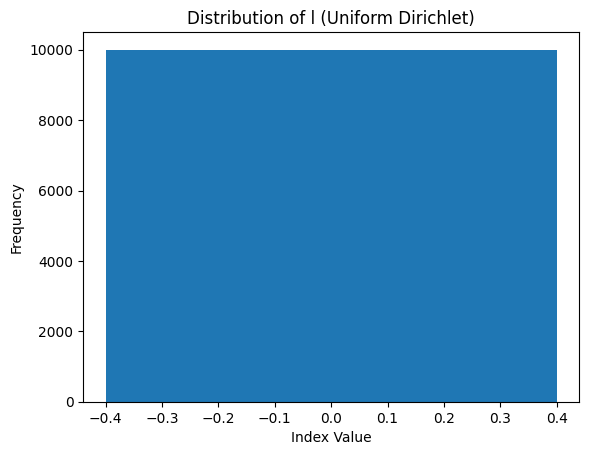

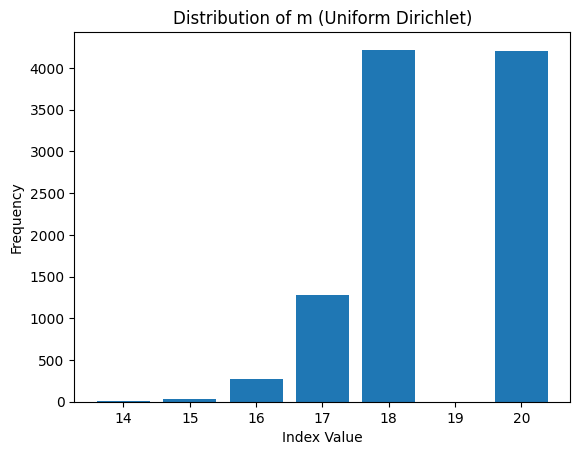

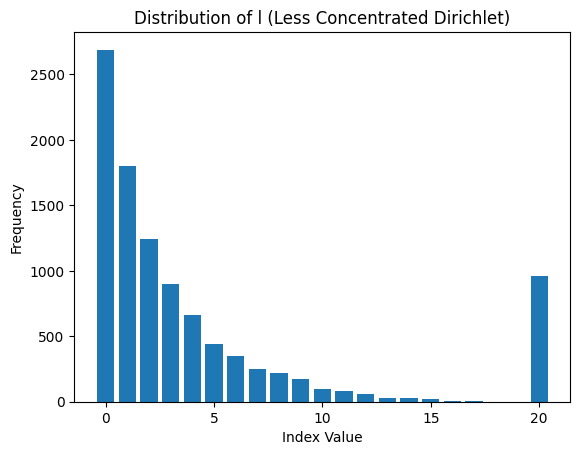

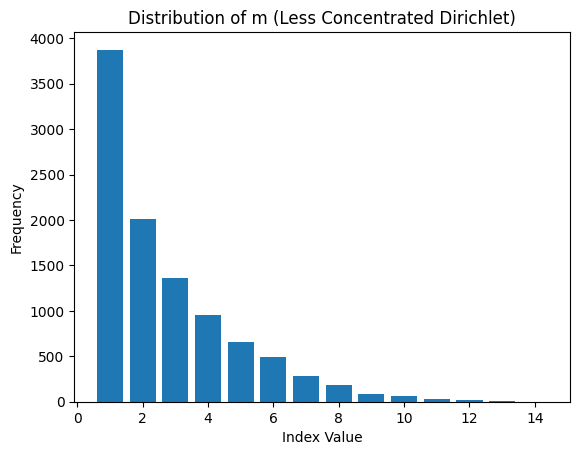

Uniform Dirichlet:
Average l: 0.00
Average m: 18.65
Proportion of infinite m: 41.99%

Less Concentrated Dirichlet:
Average l: 4.18
Average m: 2.74
Proportion of infinite m: 0.00%


In [133]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


def analyze_ltf_indices_distribution(n, alpha, num_samples, tau, gamma):
    rng = np.random.default_rng()
    l_values = []
    m_values = []
    
    for _ in range(num_samples):
        x = rng.dirichlet(alpha)
        x = np.flip(np.sort(x))
        l, m = calculate_ltf_indices(x, tau, gamma)
        l_values.append(l if l != np.inf else n)
        m_values.append(m if m != np.inf else n)
    
    return l_values, m_values

def plot_index_distribution(values, title):
    counter = Counter(values)
    plt.bar(counter.keys(), counter.values())
    plt.title(title)
    plt.xlabel('Index Value')
    plt.ylabel('Frequency')
    plt.show()

# Parameters
n = 20
num_samples = 10000
tau = 0.5
gamma = 2.0

# Analyze for uniform Dirichlet
alpha_uniform = np.ones(n)
l_uniform, m_uniform = analyze_ltf_indices_distribution(n, alpha_uniform, num_samples, tau, gamma)

# Analyze for less concentrated Dirichlet
alpha_concentrated = np.ones(n) / 20
l_concentrated, m_concentrated = analyze_ltf_indices_distribution(n, alpha_concentrated, num_samples, tau, gamma)

# Plot results
plot_index_distribution(l_uniform, 'Distribution of l (Uniform Dirichlet)')
plot_index_distribution(m_uniform, 'Distribution of m (Uniform Dirichlet)')
plot_index_distribution(l_concentrated, 'Distribution of l (Less Concentrated Dirichlet)')
plot_index_distribution(m_concentrated, 'Distribution of m (Less Concentrated Dirichlet)')

# Print some statistics
print("Uniform Dirichlet:")
print(f"Average l: {np.mean(l_uniform):.2f}")
print(f"Average m: {np.mean(m_uniform):.2f}")
print(f"Proportion of infinite m: {sum(v == n for v in m_uniform) / num_samples:.2%}")

print("\nLess Concentrated Dirichlet:")
print(f"Average l: {np.mean(l_concentrated):.2f}")
print(f"Average m: {np.mean(m_concentrated):.2f}")
print(f"Proportion of infinite m: {sum(v == n for v in m_concentrated) / num_samples:.2%}")

In [138]:
def generate_all_binary_arrays(n: int):
    """Create an array of all possible binary sequences on n bits."""
    numbers = np.arange(2**n, dtype=np.int32)
    cube = ((numbers[:, np.newaxis] >> np.arange(n)[::-1]) & 1)
    return np.sign(-1. * (cube - 0.5))




boolean_cube = generate_all_binary_arrays(10)





In [143]:
np.argwhere(boolean_cube.sum(axis=1) >= 8).squeeze()

array([  0,   1,   2,   4,   8,  16,  32,  64, 128, 256, 512])

In [146]:
2 ** np.arange(0, 10) 

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512])

/var/folders/6s/zv4ygprx6jvg4d7jsgbjfc1r0000gn/T/ipykernel_69262/2197426009.py:18: RuntimeWarning: invalid value encountered in divide
  l_ratios = weights / tail_sums
/var/folders/6s/zv4ygprx6jvg4d7jsgbjfc1r0000gn/T/ipykernel_69262/2197426009.py:19: RuntimeWarning: divide by zero encountered in divide
  m_ratios = weights[:-1] / tail_sums[1:]
/var/folders/6s/zv4ygprx6jvg4d7jsgbjfc1r0000gn/T/ipykernel_69262/2197426009.py:19: RuntimeWarning: invalid value encountered in divide
  m_ratios = weights[:-1] / tail_sums[1:]


Correlation between l and margin: 0.323
Correlation between m and margin: -0.118
Correlation between l and Chow norm: 0.628
Correlation between m and Chow norm: -0.249


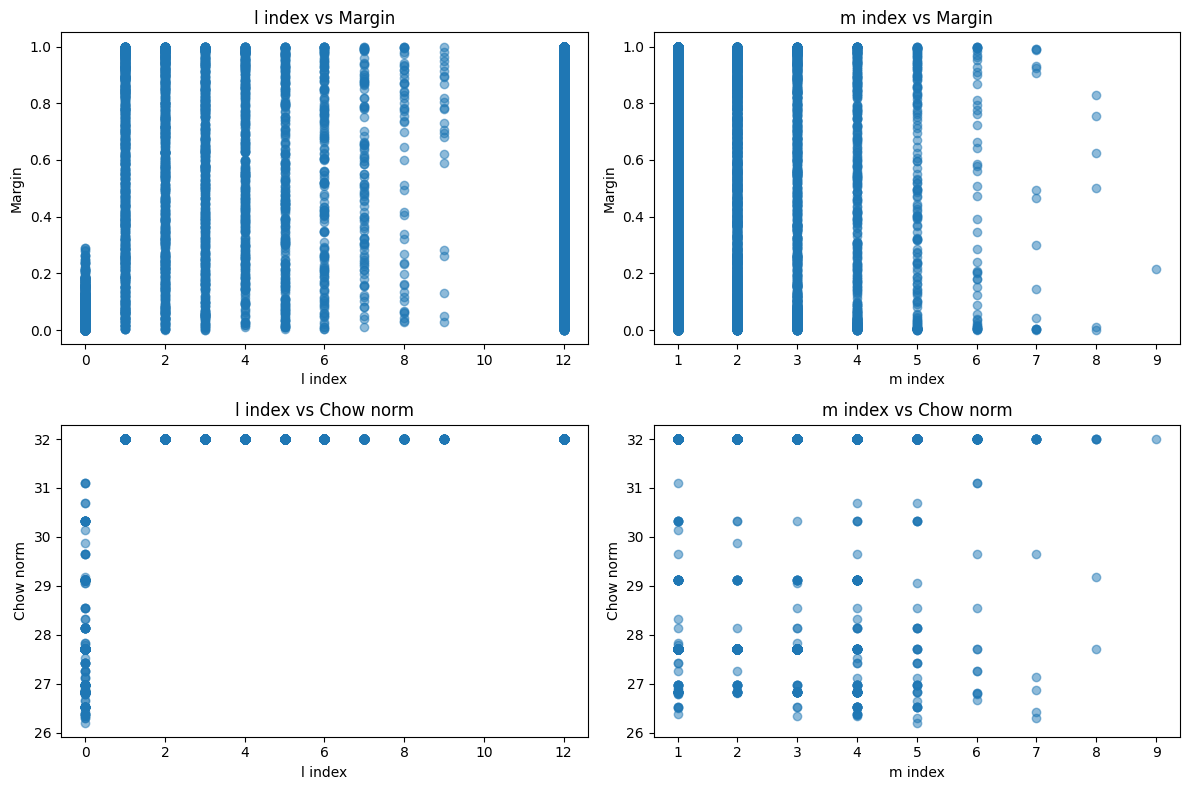

In [159]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.stats import spearmanr


def fourier_transform(u, normalize=True):
    """Multiply H_n @ u where H_n is the Hadamard matrix of dimension n x n."""
    _, n = u.shape
    m = int(np.log2(n))
    assert n == 1 << m, 'n must be a power of 2'
    x = u[..., np.newaxis]
    for _ in range(m)[::-1]:
        x = torch.cat((x[..., ::2, :] + x[..., 1::2, :], x[..., ::2, :] - x[..., 1::2, :]), dim=-1)
    return x.squeeze(-2) / 2**(m / 2) if normalize else x.squeeze(-2)




def compute_chow_parameters_and_margin(weights, threshold, n):
    n = len(weights)
    boolean_cube = torch.tensor(generate_all_binary_arrays(n), dtype=torch.float64)
    
    # Compute LTF values
    ltf_values = (torch.matmul(boolean_cube, weights) > threshold).double()
    
    # Compute Chow parameters
    chow_idx = 2 ** np.arange(0, n) 
    chow_params = fourier_transform(ltf_values.unsqueeze(0))[:, chow_idx]
    
    # Compute margin
    margins = torch.abs(torch.matmul(boolean_cube, weights) - threshold)
    margin = torch.min(margins).item()
    
    return chow_params.numpy(), margin

def analyze_ltf(n, alpha, num_samples, tau, gamma):
    rng = np.random.default_rng()
    results = []
    
    for _ in range(num_samples):
        weights = rng.dirichlet(alpha)
        weights = torch.from_numpy(np.flip(np.sort(weights)).copy())
        threshold = 0.0  # You might want to vary this
        
        l, m = calculate_ltf_indices(weights.numpy(), tau, gamma)
        chow_params, margin = compute_chow_parameters_and_margin(weights, threshold, n)
        
        results.append({
            'l': l if l != np.inf else n,
            'm': m if m != np.inf else n,
            'chow_params': chow_params,
            'margin': margin
        })
    
    return results

# Parameters
n = 12  # Dimension of the boolean cube
num_samples = 10000
tau = 0.5
gamma = 2.0
alpha = np.ones(n) / 20  # Less concentrated Dirichlet

results = analyze_ltf(n, alpha, num_samples, tau, gamma)

# Analyze relationships
l_values = [r['l'] for r in results]
m_values = [r['m'] for r in results]
margins = [r['margin'] for r in results]
chow_norms = [np.linalg.norm(r['chow_params']) for r in results]

# Correlation analysis
corr_l_margin, _ = spearmanr(l_values, margins)
corr_m_margin, _ = spearmanr(m_values, margins)
corr_l_chow, _ = spearmanr(l_values, chow_norms)
corr_m_chow, _ = spearmanr(m_values, chow_norms)

print(f"Correlation between l and margin: {corr_l_margin:.3f}")
print(f"Correlation between m and margin: {corr_m_margin:.3f}")
print(f"Correlation between l and Chow norm: {corr_l_chow:.3f}")
print(f"Correlation between m and Chow norm: {corr_m_chow:.3f}")

# Scatter plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(l_values, margins, alpha=0.5)
plt.xlabel('l index')
plt.ylabel('Margin')
plt.title('l index vs Margin')

plt.subplot(2, 2, 2)
plt.scatter(m_values, margins, alpha=0.5)
plt.xlabel('m index')
plt.ylabel('Margin')
plt.title('m index vs Margin')

plt.subplot(2, 2, 3)
plt.scatter(l_values, chow_norms, alpha=0.5)
plt.xlabel('l index')
plt.ylabel('Chow norm')
plt.title('l index vs Chow norm')

plt.subplot(2, 2, 4)
plt.scatter(m_values, chow_norms, alpha=0.5)
plt.xlabel('m index')
plt.ylabel('Chow norm')
plt.title('m index vs Chow norm')

plt.tight_layout()
plt.show()

Correlation between l and margin: 0.525
Correlation between m and margin: -0.122
Correlation between l and Chow norm: 0.533
Correlation between m and Chow norm: -0.033


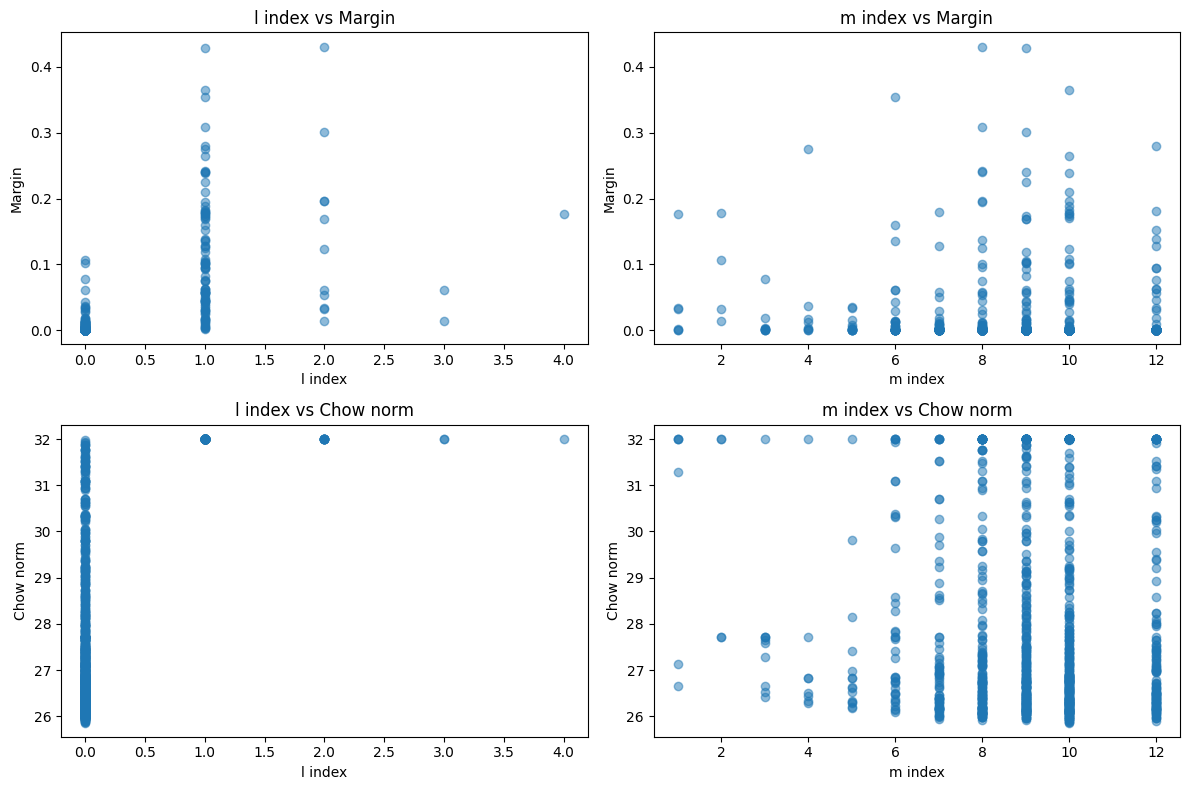

In [160]:
# Parameters
n = 12  # Dimension of the boolean cube
num_samples = 1000
tau = 0.5
gamma = 2.0
alpha = np.ones(n) / 2  # Less concentrated Dirichlet

results = analyze_ltf(n, alpha, num_samples, tau, gamma)

# Analyze relationships
l_values = [r['l'] for r in results]
m_values = [r['m'] for r in results]
margins = [r['margin'] for r in results]
chow_norms = [np.linalg.norm(r['chow_params']) for r in results]

# Correlation analysis
corr_l_margin, _ = spearmanr(l_values, margins)
corr_m_margin, _ = spearmanr(m_values, margins)
corr_l_chow, _ = spearmanr(l_values, chow_norms)
corr_m_chow, _ = spearmanr(m_values, chow_norms)

print(f"Correlation between l and margin: {corr_l_margin:.3f}")
print(f"Correlation between m and margin: {corr_m_margin:.3f}")
print(f"Correlation between l and Chow norm: {corr_l_chow:.3f}")
print(f"Correlation between m and Chow norm: {corr_m_chow:.3f}")

# Scatter plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(l_values, margins, alpha=0.5)
plt.xlabel('l index')
plt.ylabel('Margin')
plt.title('l index vs Margin')

plt.subplot(2, 2, 2)
plt.scatter(m_values, margins, alpha=0.5)
plt.xlabel('m index')
plt.ylabel('Margin')
plt.title('m index vs Margin')

plt.subplot(2, 2, 3)
plt.scatter(l_values, chow_norms, alpha=0.5)
plt.xlabel('l index')
plt.ylabel('Chow norm')
plt.title('l index vs Chow norm')

plt.subplot(2, 2, 4)
plt.scatter(m_values, chow_norms, alpha=0.5)
plt.xlabel('m index')
plt.ylabel('Chow norm')
plt.title('m index vs Chow norm')

plt.tight_layout()
plt.show()

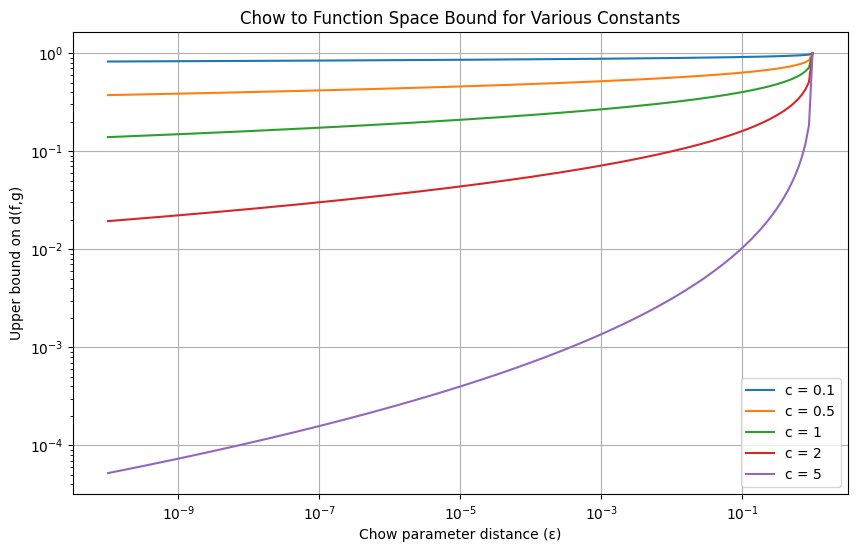

For Chow parameter distance ε = 0.01
Upper bound on d(f,g) ≤ 0.315623

Interpretation:
With 68.44% confidence, the functions differ on at most 31.56% of inputs.


In [163]:
import numpy as np
import matplotlib.pyplot as plt

def chow_to_function_space_bound(eps, c=1):
    """
    Compute upper bound on d(f,g) given Chow parameter distance eps.
    
    :param eps: Chow parameter distance
    :param c: Constant factor (default 1, but could be adjusted)
    :return: Upper bound on d(f,g)
    """
    omega = c * (np.log(1.0 / eps)) ** (1.0 / 3)
    return 2 ** (-omega)

# Visualize the bound for different values of c
eps_values = np.logspace(-10, 0, 200)
plt.figure(figsize=(10, 6))

for c in [0.1, 0.5, 1, 2, 5]:
    bounds = [chow_to_function_space_bound(eps, c) for eps in eps_values]
    plt.loglog(eps_values, bounds, label=f'c = {c}')

plt.xlabel('Chow parameter distance (ε)')
plt.ylabel('Upper bound on d(f,g)')
plt.title('Chow to Function Space Bound for Various Constants')
plt.legend()
plt.grid(True)
plt.show()

# Example usage
eps = 0.01
bound = chow_to_function_space_bound(eps)
print(f"For Chow parameter distance ε = {eps}")
print(f"Upper bound on d(f,g) ≤ {bound:.6f}")

# Interpret the bound
print(f"\nInterpretation:")
print(f"With {1-bound:.2%} confidence, the functions differ on at most {bound:.2%} of inputs.")